$$\Huge{\text{Overfit}}$$ 
$$ Binh ~ Tran $$

# Introduction

## Polynomial interpolation Lagrange 

Given a set of $n + 1$ data points $(x_i, y_i)$ where no two $x_i$ are the same, one is looking for a polynomial $p$ of degree at most $n$ with the property

$p(x_i) = y_i$. $i = 1,2,...,n$ 

Reffer to [here](https://en.wikipedia.org/wiki/Polynomial_interpolation) and [here](https://en.wikipedia.org/wiki/Lagrange_polynomial) for detail.

___
** It is good for Supervised Learning? **
___

** See chart below **

In [40]:
import pixiedust

In [38]:
#
# %%writefile ex_kind_of_overfit.py
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(4)
from sklearn import datasets, linear_model

N = 30
N_test = 20 
X = np.random.rand(N, 1)*5
y = 3*(X -2) * (X - 3) * (X-4) +  10*np.random.randn(N, 1)

X_test = (np.random.rand(N_test,1) - 1/8) *10

y_test = 3*(X_test -2) * (X_test - 3) * (X_test-4) +  10*np.random.randn(N_test, 1)

def buildX(X, d = 2):
    res = np.ones((X.shape[0], 1))
    for i in range(1, d+1):
        res = np.concatenate((res, X**i), axis = 1)
    return res 

def myfit(X, y, d):
    Xbar = buildX(X, d)
    regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y)

    w = regr.coef_
    # Display result
    w_0 = w[0][0]
    w_1 = w[0][1]
    x0 = np.linspace(-2, 7, 200, endpoint=True)
    y0 = np.zeros_like(x0)
    ytrue = 5*(x0 - 2)*(x0-3)*(x0-4)
    for i in range(d+1):
        y0 += w[0][i]*x0**i

    # Draw the fitting line 
    plt.scatter(X.T, y.T, c = 'r', s = 40, label = 'Training samples')     # data 
#     print(X_test.shape, y_test.shape)
    plt.scatter(X_test.T, y_test.T, c = 'y', s = 40, label = 'Test samples')     # data 
    
    plt.plot(x0, y0, 'b', linewidth = 2, label = "Trained model")   # the fitting line
    plt.plot(x0, ytrue, 'g', linewidth = 2, label = "True model")   # the fitting line
    plt.xticks([], [])
    plt.yticks([], [])
    if d < 3:
        str1 = 'Underfitting'
    elif d > 4:
        str1 = 'Overfitting'
    else:
        str1 = 'Good fit'
    str0 = 'Degree = ' + str(d) + ': ' + str1
    plt.title(str0)
    plt.axis([-4, 10, np.amin(y_test) - 100, np.amax(y) + 100])
    plt.legend(loc="best")
    
    fn = 'linreg_' + str(d) + '.png'
    
    plt.xlabel('$x$', fontsize = 20);
    plt.ylabel('$y$', fontsize = 20);
    
#     plt.savefig(fn, bbox_inches='tight', dpi = 600)
    
    plt.show()
#     print(w)

%%pixie_debugger
myfit(X, y, 1)

# myfit(X, y, 2)
# myfit(X, y, 3)
# myfit(X, y, 4)
# myfit(X, y, 8)
# myfit(X, y, 16)


SyntaxError: invalid syntax (<ipython-input-38-8cb2896c0d7a>, line 69)

** Actually it is too fit and it is not good for ML **

With what we already know from **Linear Regression**, with this kind of data, we can **apply Polynomial Regression.** by extended data for a pair of points $(x, y)$ with $x = [1, x, x^2, x^3, ..., x^d]^T$.

* Large error phenomena with outlier points of given points.
* Overfitting is a pattern finding phenomenon that matches the training data. This may lead to false predictions, and model quality is not good on test data.
* The training data is too small and the complexity of the model is too high.

** Are there any techniques to help avoid overfitting?**


* We need some measure to evaluate the model's quality on training data and test data.
* **Train error:**

$$\text{train error}= \frac{1}{N_{\text{train}}} \sum_{\text{training set}} \|\mathbf{y} - \mathbf{\hat{y}}\|_p^2$$
___
Note: With Classification, the cross entropy can be used.
___

* **Test error:**
$$\text{test error}= \frac{1}{N_{\text{test}}} \sum_{\text{test set}} \|\mathbf{y} - \mathbf{\hat{y}}\|_p^2$$

___
$$ \large \mathbf{ \text {A model is considered good if both train error and test error are low} }$$
___

___
$$ \large \mathbf{ \text {If train error is low but test error is high, we say the model is overfitting} }$$
___

___
$$ \large \mathbf{ \text {If train error is high and test error is high, we say the model is underfitting} }$$
___

# Validation

## Validation
We are used to dividing data into two sets: 
    * training data 
    * and test data. 
Remember that when building models, we do not use test data. So how to know the quality of the model with unseen data

The simplest method is 
> Extract the training data into a small subset and perform a model evaluation on this small subset. A **small subset** of this training set is called a **validation set**

 $\Rightarrow$ new define **validation error** is error is calculated on the validation set.

> With this new concept, we find the model so that both the train error and the validation error are small, which can be predicted that the test error is also small.

The most commonly used method is to use a variety of models. Which model for the smallest validation error would be a good model.

Normally, we start from the simple model, then gradually increase the complexity of the model. Once the validation error has increased, select the previous model. Note that the more complex the model, the more likely the train error will be.

The following example shows the order in which the polynomial increases from 1 to 8. The validation set consists of 10 points taken from the original training set.

49


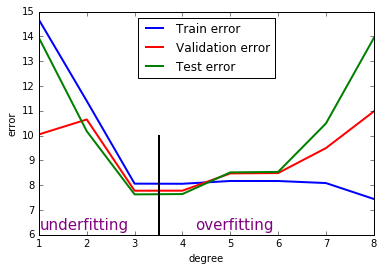

In [1]:
# %load ex_validation_overfix.py
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(5)
from sklearn import datasets, linear_model

N = 50
N_test = 10 
X = np.random.rand(N, 1)*5
y = 3*(X -2) * (X - 3)*(X-4) +  10*np.random.randn(N, 1)

# split train to train + valid use train_test_split 
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=0)

# generate test data
X_test = (np.random.rand(N_test,1)) *5
y_test = 3*(X_test -2) * (X_test - 3)*(X_test-4) +  10*np.random.randn(N_test, 1)

# 1 + X^1 + X^2 + ... + X^d
def build_X_bar(X, d = 2):
    res = np.ones((X.shape[0], 1))
    for i in range(1, d+1):
        res = np.concatenate((res, X**i), axis = 1)
    return res 

def poly(a, x):
    """
    return a[0] + a[1]*x + a[2]*x**2 + .... 
    """
    res = np.zeros_like(x)
    for i in range(len(a) - 1, -1, -1):
        res = res*x + a[i] 
    return res 

x = 2
a = [1, 2, 3, 4]
print(poly(a, x))

def MSE(x, y, w):     
#     d = len(w) - 1
    y_pred = poly(w, x)
    return np.mean(np.abs(y - y_pred))

def myfit(d):
    Xbar = build_X_bar(X_train, d)
    regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y_train)

    w = regr.coef_[0]
    train_err = MSE(X_train, y_train, w)
    valid_err = MSE(X_valid, y_valid, w)
    test_err = MSE(X_test, y_test, w)
                    
    return (train_err, valid_err, test_err)
    
    
Train_error = []
Test_error = []
Valid_error = []
degree = 9
for d in range(1, degree):
    (train_err, valid_err, test_err) = myfit(d) 
    Train_error.append(train_err)
    Test_error.append(test_err)
    Valid_error.append(valid_err)

degree = range(1, degree)

fig = plt.figure()
# fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)

plt.plot(degree, Train_error, 'b-', linewidth = 2, label = "Train error")
plt.plot(degree, Valid_error, 'r-', linewidth = 2, label = "Validation error")
plt.plot(degree, Test_error, 'g-', linewidth = 2, label = "Test error")
plt.legend(loc="best")
plt.xlabel('degree')
plt.ylabel('error')


plt.plot([3.5, 3.5], [6, 10], color='k', linestyle='-', linewidth=2)
ax.text(0.7, 0.01, 'overfitting',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='purple', fontsize=15)
ax.text(0.27, 0.01, 'underfitting',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='purple', fontsize=15)
# plt.savefig('linreg_val.png', bbox_inches='tight', dpi = 600)
plt.show()

** Analyse **
* Consider the <span style='color:blue'>train error line</span>. When the degree of the polynomial increases, the train error tends to decrease.
> This is understandable because the higher degree polynomial, the better the data fit.
* Consider the  <span style='color:red'>validation error line</span>. When the degree of the polynomial is 3, 4, the validation error is low and the increase.

We see that the <span style='color:green'> test error line</span> is the same the  <span style='color:red'>validation error line</span>.

> Do not use test data when selecting the model above, but still get good results because we assume that validation data and test data have a certain characteristics.


## Cross validation

- In many cases, we have a **very limited amount of data** to model.
- If you take too much data in the training file as validation data, the rest of the training data is not enough to build the model.

$\Rightarrow$ the validation data must be very small to keep the amount of data for training large enough.

> But when validation is too small, overfitting can occur with the remaining training set. 

** Cross validation **
>Cross validation is an improvement of validation with the **amount of data** in the validation set is **small** but the **quality of the model is evaluated** on **many** different validation sets.

** How to do **

One common way

* **Split the training set** into **k subset** with no intersection element, **approximately the same size.**
* ** At each test, called run**
    * Get a subset as a validata set
    * The model will be based on the combination of the remaining k-1 subsets
* The final model is based on the average of train errors and validation errors
> This is also called **k-fold cross validation**.
When k is equal to the length of the training set, ie each subset has exactly one element, we call this technique **leave-one-out**.
* Reference: [Cross-validation: evaluating estimator performance.](http://scikit-learn.org/stable/modules/cross_validation.html)

# Regularization

* One major disadvantage of cross-validation is that the number of training runs is **proportional (ti le thuan)** to k
* In machine learning, 
    * The numner of features need to calculate degree is large. 
    * The value range of feature is large
    * Feature can be Real number.

$\Rightarrow$ is too complex

There is a way to reduce the number of models that need training, even one model. This is called regularization.

**Regularization** is to change the model a bit to avoid overfitting but retains its generality

## Early Stopping

In many Machine Learning problems, we need to use iterative algorithms to find solutions. For example Gradient Descent. In general, the loss function decreases as the number of loops increases.

**Early stopping** the algorithm **stops before** the loss function reaches **too small** values, thus avoiding overfitting.


** So when stop it is appropriate? **
* A common technique is to **separate** the training set into a set of **validation sets**
    * After a (or some) loop, we calculate train error and validation error
    * Stop when validation error tends to increase and back to the model corresponding to the point and validation error to a small value.

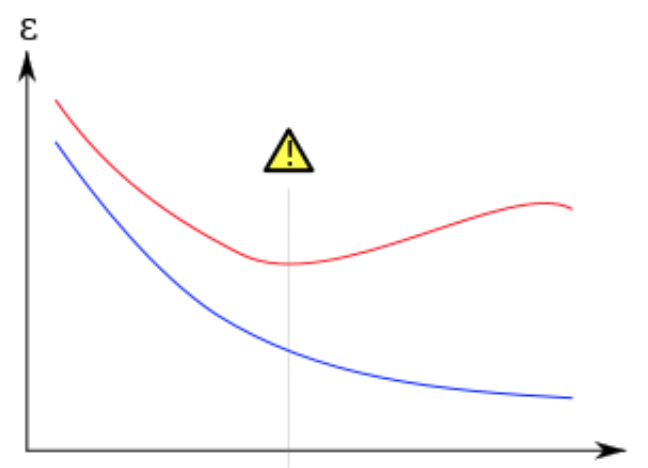

> * The x axis is the number of loops, the y axis is error.
* The blue line is train error, the red line is validation error.
* The model is defined at the loop where the validation error is the smallest value.

This method is quite similar to the polynomial finding method in the upper part.

## Add termination to the loss function

The most common regularization technique is to add another 'function' into loss function
* This 'function' is often used to evaluate the complexity of the model.
* The larger the 'function', the more complex the model

This **new loss function** is often called a **regularized loss function** and defined as below

\begin{eqnarray}
J_{\text{reg}}(\theta) &=& J(\theta) + \lambda R(\theta) \\
Where &~& \\
J(\theta)&:& \text{loss function} \\
R(\theta)&:& \text{termization regularization} \\
λ&:& \text {usually a positive number to balance the two quantities on the right-hand side.}
\end{eqnarray}

The minimum regularized loss function, **said relatively**, means minimal loss function and regularization term

**Relatively** because the root of optimal loss function and regularized loss function is different

$\Large \mathbf{\text{✔︎ Some commonly used regularization techniques in Neural Networks are:}}$

## l2 regularization

> ** With L2 **  
$$R(\mathbf{w}) = \|\mathbf{w}\|_2^2$$

* **Characteristics:**
    * It is differentiable at  at any $\mathbf{w}$
    * Its derivative is simply $\mathbf{w}$
    * The derivative of the regularized loss function is also very easy to calculate  
    
        $$\frac{\partial J_{\text{reg}} }{\partial \mathbf{w}} = \frac{\partial J}{\partial \mathbf{w}} + \lambda \mathbf{w}$$  
          
    * Minimizing $\|\mathbf{w}\|_2^2$ means that the values of the w coefficients become small close to zero.
        > * With **Polynomial Regression**, the fact that these coefficients are small can help the coefficients for **high degree** terms be small, **avoiding overfitting**.
     * With the **Multi-layer Pereceptron**, these small coefficients make many coefficients in the weight matrix small. It also helps **MLP avoid overfitting**

___
$\Large \mathbf{\text{It is also called a weight decay.}}$
___

$\large \text{ In Statistical Probability, Linear Regression with l2 regularization is called} \mathbf {\text{ Ridge Regression.}}$

The lost function of Ridge Regression is:
$$ J(\mathbf{w}) = \frac{1}{2} \|\mathbf{y} - \mathbf{Xw}\|_2^2 + \lambda \|\mathbf{w}\|_2^2 $$


** Example of Weight Decay with MLP**

Generated data with three clusters that follow the normal distribution centered on  
<pre> [[-1, -1], [1, -1], [0, 1]].

In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(4)

means = [[-1, -1], [1, -1], [0, 1]]
cov = [[1, 0], [0, 1]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T


def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 6, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 6, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 6, alpha = .8)

#     plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)
plt.show()
y = original_label.T
X = X.T


In [2]:
def kmeans_display_3D(X, label, xx, yy, zz):
#     K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
#     plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 6, alpha = .8)
#     plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 6, alpha = .8)
#     plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 6, alpha = .8)
    p3.figure()
#     
    label = original_label
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    p3.scatter(X0[:, 0] , X0[:, 1] , np.zeros(len(X0)),marker='sphere', color='blue')
    p3.scatter(X1[:, 0], X1[:, 1], np.ones(len(X1)) ,marker='sphere', color='gray')
    p3.scatter(X2[:, 0], X2[:, 1], np.ones(len(X2))*2.0 ,marker='sphere', color='red')
    
    
    from matplotlib import cm
    colormap = cm.coolwarm
    znorm = zz - zz.min()
   
    znorm = znorm / znorm.ptp()
    znorm.min(), znorm.max()
    color = colormap(znorm)
    
    p3.plot_wireframe(xx, yy, zz, color=color[...,0:3])
    
    p3.xyzlim(-4, 4)
    p3.show()
    


iter 0, loss: 1.099150
iter 1000, loss: 0.507520
iter 2000, loss: 0.513978
iter 3000, loss: 0.512888
iter 4000, loss: 0.512209
iter 5000, loss: 0.511257
iter 6000, loss: 0.511039
iter 7000, loss: 0.511780
iter 8000, loss: 0.511431
iter 9000, loss: 0.511137
training accuracy: 88.33 %
(1, 140000)


/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


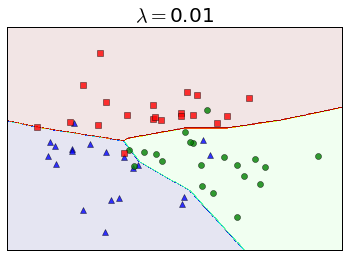

In [3]:
import pandas as pd
from matplotlib import cm
import ipyvolume.pylab as p3
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

## One-hot coding
from scipy import sparse 
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

# cost or loss function  
lam = 0.001 # regularization parameter 
def cost(Y, Yhat, W1, W2, lam):    
    return -np.sum(Y*np.log(Yhat))/Y.shape[1] + \
        lam*(np.linalg.norm(W1)**2 + np.linalg.norm(W2)**2)

d0 = 2 # size of input vector 
d1 = h = 100 # size of hidden layer vector
d2 = C = 3 # size of output vector

def mynet(lam):
    # initialize parameters randomely 
    W1 = 0.01*np.random.randn(d0, d1)
    b1 = np.zeros((d1, 1))
    W2 = 0.01*np.random.randn(d1, d2)
    b2 = np.zeros((d2, 1))

    # X = X.T # each column of X is a data point 
    Y = convert_labels(y, C)
    N = X.shape[1]
    eta = 1 # learning rate 
    for i in range(10000):
        ## Feedforward 
        Z1 = np.dot(W1.T, X) + b1 
        A1 = np.maximum(Z1, 0)
        Z2 = np.dot(W2.T, A1) + b2
        # import pdb; pdb.set_trace()  # breakpoint 035ab9b5 //
        Yhat = softmax(Z2)

        # compute the loss: average cross-entropy loss
        

        # print loss after each 1000 iterations
        if i %1000 == 0: 
            loss = cost(Y, Yhat, W1, W2, lam)
            print("iter %d, loss: %f" %(i, loss))

        # backpropagation
        E2 = (Yhat - Y )/N
        dW2 = np.dot(A1, E2.T) + lam*W2
        db2 = np.sum(E2, axis = 1, keepdims = True)
        E1 = np.dot(W2, E2)
        E1[Z1 <= 0] = 0 # gradient of ReLU 
        dW1 = np.dot(X, E1.T) + lam*W1
        db1 = np.sum(E1, axis = 1, keepdims = True)

        # Gradient Descent update 
        # import pdb; pdb.set_trace()  # breakpoint 47741f63 //
        W1 += -eta*dW1 
        b1 += -eta*db1 
        W2 += -eta*dW2
        b2 += -eta*db2 
#     return (W1, W2, b1, b2)


    Z1 = np.dot(W1.T, X) + b1 
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    predicted_class = np.argmax(Z2, axis=0)
    acc = (100*np.mean(predicted_class == y))
    print('training accuracy: %.2f %%' % acc)


    xm = np.arange(-3, 4, 0.02)
    xlen = len(xm)
    ym = np.arange(-4, 4, 0.02)
    ylen = len(ym)
    xx, yy = np.meshgrid(xm, ym)

    print(np.ones((1, xx.size)).shape)
    xx1 = xx.ravel().reshape(1, xx.size)
    yy1 = yy.ravel().reshape(1, yy.size)

    X0 = np.vstack((xx1, yy1))
    
    Z1 = np.dot(W1.T, X0) + b1 
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    # predicted class 
    Z = np.argmax(Z2, axis=0)
    

    ZZ = Z.reshape(xx.shape)
    
 
    CS = plt.contourf(xx, yy, ZZ, 200, cmap='jet', alpha = .1)
    

   
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])
    
    plt.title('$\lambda =$' + str(lam), fontsize = 20)
    fn = 'nnet_reg'+ str(lam) + '.png'
    
    kmeans_display_3D(X.T, original_label.T, xx, yy, ZZ)

    kmeans_display(X.T, original_label.T)
    
# mynet(0)
# mynet(0.1)
mynet(0.01)
# mynet(0.001)

In this example, we use the regularization term:

$$\lambda R(\mathbf{W}) = \lambda \sum_{l=1}^L \|\mathbf{W}^{(l)}\|_F^2$$
Ref to [here](http://mathworld.wolfram.com/FrobeniusNorm.html)

## Tikhonov regularization

$\lambda R(\mathbf{w}) = \|\Gamma \mathbf{w}\|_2^2$


The most commonly used matrix $\Gamma$ is the diagonal matrix  
Notice that $l_2$ regularization is a special case of Tikhonov regularization with $\Gamma = \lambda \mathbf{I}$  

When the elements on the diagonal of $\Gamma$ are different, we have a version called weighted $l_2$ regularization, which assigns different weights to each element in $\mathbf{w}$. The higher $\Gamma_{i,i}$, the smaller the corresponding $w_{k,i}$ (to ensure that the loss function is small).

## Regularizers for sparsity

In many cases, we want the real coefficients to be zero rather than small near zero as $l_2$ regularization has done above.  
At that time, there is another regularization used, namely $l_0$ regularization:

$$ R(\mathbf{W}) = \|\mathbf{w}\|_0 $$

Norm 0 is not a norm but a pseudo-norm. (You are encouraged to read more about norms.) Norm 0 of a vector is the number of nonzero elements of that vector. When norm 0 is small, ie many of the elements in that vector are zero, we say that the vector is sparse.

Solving the problem of minimum norm 0 is difficult because the function is not convex, not continuous. Instead, norm 1 is commonly used:
$$R(\mathbf{W}) = \|\mathbf{w}\|_1 = \sum_{i=0}^d |w_i|$$

## Regularization trong sklearn

In sklearn, for example **Logistic Regression**, you can also use the $l_2$ regularizations by declaring the penalty variable = $'l_1'$ or penalty = $'l_2'$ and variable C where C is the inverse of $\lambda$.

In the **Binary Classification** topic we use C=1e5 it means $\lambda$ very small

# Other methods

* **Dropout** in Deep Neural Networks
> Dropout is a way to **turn off random units** in networks. **Turn off means** set zero value units and feedforward and normal backpropagation calculations during training. This not only reduces the amount of calculations, but also reduces overfit.

# Sumary

* A good model is a generic model that describes the data both inside and outside the training set.
* To avoid overfitting, there are many techniques used, typically:
    * **Cross-validation and regularization.** 
    * In Neural Networks, **weight decay** and **dropout** are commonly used.